# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/'

### 之前做過的處理

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['age'] = abs(app_train['DAYS_BIRTH']) / 365
app_train['age'].head()

0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
Name: age, dtype: float64

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [10]:
# 新增欄位 "equal_width_age", 對年齡做等寬劃分
app_train['equal_width_age'] = pd.cut(app_train['age'], 7)

In [11]:
# 觀察等寬劃分下, 每個種組距各出現幾次
app_train['equal_width_age'].value_counts()

(34.404, 41.348]    59086
(27.461, 34.404]    55142
(41.348, 48.291]    53366
(48.291, 55.234]    48113
(55.234, 62.177]    44116
(20.469, 27.461]    24663
(62.177, 69.121]    23025
Name: equal_width_age, dtype: int64

In [17]:
# 新增一個欄位 customized_age_grp，把 age 分為 (20, 30], (30, 40], (40, 50], (50, 60], (60, 70] 這五組
app_train["customized_age_grp"] = pd.cut(app_train['age'], bins=[20, 30, 40, 50, 60, 70])
app_train["customized_age_grp"].value_counts()

(30, 40]    82308
(40, 50]    76541
(50, 60]    68062
(20, 30]    45021
(60, 70]    35579
Name: customized_age_grp, dtype: int64

In [20]:
# 繪圖前先排序 / 分組
age_group_sorted = app_train['equal_width_age'].sort_values().unique()

age_groups  = app_train.groupby('equal_width_age').mean()
age_groups

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,age
equal_width_age,,,,,,,,,,,,,,,,,,,,,
"(20.469, 27.461]",277611.938369,0.115720,0.195840,0.344889,0.612821,0.314844,153301.004305,451987.273568,23307.101695,408227.263589,...,0.000851,0.003446,0.009391,0.008596,0.033003,0.167241,0.268796,1.673741,0.003244,24.906544
"(27.461, 34.404]",277701.617043,0.106743,0.095970,0.401346,0.619673,0.727921,171915.175810,550807.735329,27038.101219,495213.550334,...,0.000689,0.000127,0.006135,0.007210,0.034510,0.278164,0.252424,1.788410,0.003428,30.896549
"(34.404, 41.348]",278441.966371,0.088227,0.096300,0.405375,0.664015,0.823833,181611.546788,625953.248765,28251.516079,562936.976269,...,0.000592,0.000118,0.006110,0.007221,0.034265,0.281076,0.262938,1.829037,0.008530,37.940874
"(41.348, 48.291]",278352.860642,0.076491,0.092418,0.377975,0.714837,0.443503,181883.141750,661660.225752,28985.684535,592937.294963,...,0.000656,0.000037,0.006569,0.006229,0.033868,0.298962,0.255847,1.872651,0.022842,44.686507
"(48.291, 55.234]",278379.518924,0.068339,0.083283,0.318001,0.739073,0.130609,172004.528380,655724.212354,28274.580688,588800.369234,...,0.000333,0.000021,0.006184,0.006829,0.035839,0.297073,0.263287,1.947495,0.111051,51.841231
"(55.234, 62.177]",278474.583824,0.054787,0.078384,0.239981,0.757140,0.033095,155068.579912,630562.300073,26531.216797,567400.500408,...,0.000249,0.000023,0.006101,0.006669,0.034097,0.260754,0.279831,2.059921,0.639065,58.585824
"(62.177, 69.121]",277886.832790,0.047123,0.046471,0.171118,0.768078,0.011075,134326.719903,478831.843779,22735.512508,430805.799865,...,0.000000,0.000000,0.005629,0.007237,0.034126,0.176509,0.299543,2.219983,0.861933,64.617193


Text(0, 0.5, 'AMT_INCOME_TOTAL')

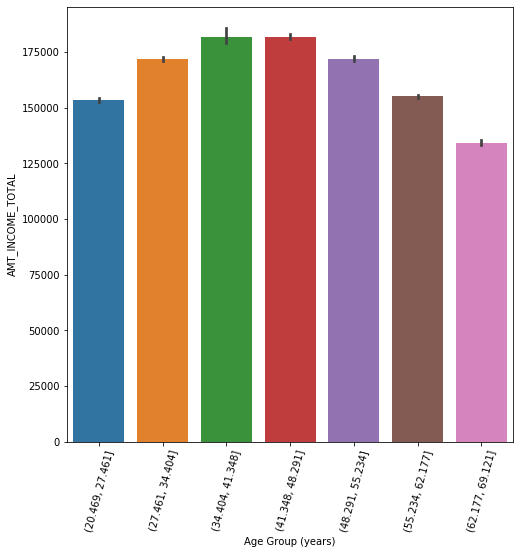

In [22]:
import seaborn as sns
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, AMT_INCOME_TOTAL 為 y 繪製 barplot

px = app_train['equal_width_age']
py =app_train['AMT_INCOME_TOTAL']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('AMT_INCOME_TOTAL')